In [1]:
# DATASCIENCE!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# main imports
import cv2
import pytesseract as ts
import re

# utils
from zipfile import ZipFile
# from google.colab.patches import cv2_imshow
import imutils
import os
from glob import glob
from tqdm import tqdm

In [2]:
imge = cv2.imread('/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Data/tesseract/Receipts/1141-receipt.jpg')

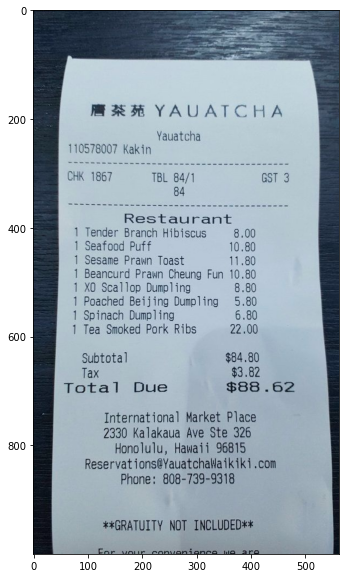

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(imge)
plt.show()

In [5]:
print(ts.image_to_string(imge))

MAR YAUATCHA

Yauatcha
110578007 Kakin

CHK 1867 TBL 84/1

Restaurant
1 Tender Branch Hibiscus 8.00
1 Seafood Puff 10.80
1 Sesame Prawn Toast 11.80
1 Beancurd Prawn Cheung Fun 10.80
1 X0 Scallop Dumpling 8.80
1 Poached Beijing Dumpling 5.80
1 Spinach Dumpling 6.80
1 Tea Smoked Pork Ribs 22.00

Subtotal $84.80
Tax $3.82
Total Due $88 .62

International Market Place
2330 Kalakaua Ave Ste 326
Honolulu, Hawaii 96815
Reservat ions@YauatchaWaikiki .com
Phone: 808-739-9318

**GRATUITY NOT INCLUDED**

 

GO ce pt ns red



In [6]:
print(ts.image_to_osd(imge))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 13.83
Script: Latin
Script confidence: 11.37



**Image to word bounding boxes**

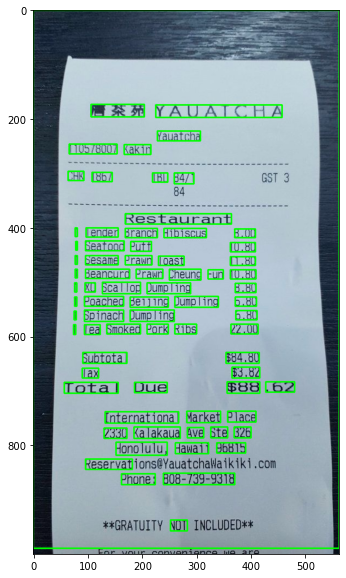

In [11]:
dd = ts.image_to_data(imge, config='-l rus+eng', output_type=ts.Output.DICT)
n_boxes = len(dd['text'])
for i in range(n_boxes):
    if int(dd['conf'][i]) > 50:
        (x,y,w,h) = (dd['left'][i],dd['top'][i],dd['width'][i],dd['height'][i])
        imge = cv2.rectangle(imge, (x,y),(x+w, y+h), (0,255,0),2)

plt.figure(figsize=(10,10))
plt.imshow(imge)
plt.show()

**Image to characters bounding boxes**

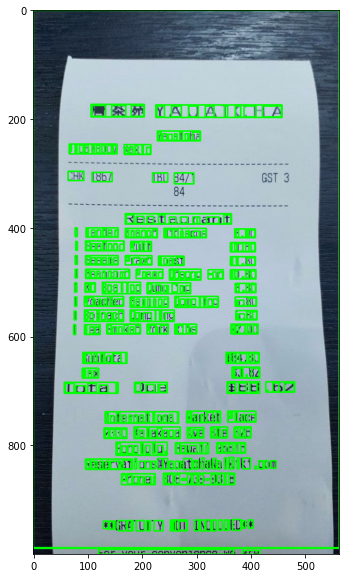

In [12]:
h, w, c = imge.shape
boxes = ts.image_to_boxes(imge, config = '-l rus+eng')
for bxes in boxes.splitlines():
    bxes = bxes.split(' ')
    imge = cv2.rectangle(imge, (int(bxes[1]), h - int(bxes[2])), (int(bxes[3]), h- int(bxes[4])), (0,255,0),2)
    
plt.figure(figsize=(12,10))
plt.imshow(imge)
plt.show()